In [216]:
import numpy as np
import gdal
import skimage.io as skio
from skimage import exposure
from skimage.segmentation import quickshift
import time
import matplotlib.pyplot as plt
import numpy as np
import os
import re
from skimage.transform import resize
from PIL import Image
from sklearn.metrics import mutual_info_score, normalized_mutual_info_score,mean_squared_error

import cv2
import matplotlib.pyplot as plt
from dictances import bhattacharyya_coefficient
from scipy.stats import gaussian_kde
from math import sqrt


In [206]:
path = "./ptorch pix original/results/prez_gan_1/test_latest/gan_output_for_aug/"

real_hists=[]
fake_hists=[]

for file in os.listdir(path):
    
    image = skio.imread(path+file, as_gray=True)
#     image = cv2.imread(path+file)
#     gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#     histogram = cv2.calcHist([gray_image], [0], None, [256], [0, 256])
    histogram, bin_edges = np.histogram(image, bins=256, range=(0, 1))

    if ('real_B' in file):
        real_hists.append(histogram)
    if ('fake' in file):
        fake_hists.append(histogram)
        

   


In [217]:
# #DICTANES
# real_dict={}
# fake_dict={}
# for i in range(0,256):
#     real_dict[i] = real_hists[0][i]
#     fake_dict[i] = fake_hists[0][i] 
# #     real_dict[str(i)] = real_hists[i]
# #     fake_dict[str(i)] = fake_hists[i]
# # print(len(fake_hists[0]))

# bhattacharyya_coefficient(real_dict,fake_dict)

59098.48767360406

In [208]:
# generate and output scores
scores = []
for i in range(len(fake_hists)):
    score.append( bhatta_dist(real_hists[i], fake_hists[i]) );
    scores.append(score);
print('NEW SCORE IS ' , np.mean(scores))

OLD GAN SCORE IS  0.4610659172977823


In [209]:
path = "./gan_output_old/junpyimages/"

real_hists=[]
fake_hists=[]

for file in os.listdir(path):
    
    image = skio.imread(path+file, as_gray=True)
#     image = cv2.imread(path+file)
#     gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#     histogram = cv2.calcHist([gray_image], [0], None, [256], [0, 256])
    histogram, bin_edges = np.histogram(image, bins=256, range=(0, 1))

    if ('real_B' in file):
        real_hists.append(histogram)
    if ('fake' in file):
        fake_hists.append(histogram)
        


In [210]:
# generate and output scores
old_gan_scores = []
for i in range(len(fake_hists)):
    score.append( bhatta_dist(real_hists[i], fake_hists[i]) );
    old_gan_scores.append(score);

In [211]:
print('OLD GAN SCORE IS ' , np.mean(old_gan_scores))

OLD GAN SCORE IS  0.46160291377863816


In [199]:
def bhatta_dist(X1, X2, method='continuous'):
    #Calculate the Bhattacharyya distance between X1 and X2. X1 and X2 should be 1D numpy arrays representing the same
    # feature in two separate classes. 

    def get_density(x, cov_factor=0.1):
        #Produces a continuous density function for the data in 'x'. Some benefit may be gained from adjusting the cov_factor.
        density = gaussian_kde(x)
        density.covariance_factor = lambda:cov_factor
        density._compute_covariance()
        return density

    #Combine X1 and X2, we'll use it later:
    cX = np.concatenate((X1,X2))

    if method == 'noiseless':
        ###This method works well when the feature is qualitative (rather than quantitative). Each unique value is
        ### treated as an individual bin.
        uX = np.unique(cX)
        A1 = len(X1) * (max(cX)-min(cX)) / len(uX)
        A2 = len(X2) * (max(cX)-min(cX)) / len(uX)
        bht = 0
        for x in uX:
            p1 = (X1==x).sum() / A1
            p2 = (X2==x).sum() / A2
            bht += sqrt(p1*p2) * (max(cX)-min(cX))/len(uX)

    elif method == 'hist':
        ###Bin the values into a hardcoded number of bins (This is sensitive to N_BINS)
        N_BINS = 10
        #Bin the values:
        h1 = np.histogram(X1,bins=N_BINS,range=(min(cX),max(cX)), density=True)[0]
        h2 = np.histogram(X2,bins=N_BINS,range=(min(cX),max(cX)), density=True)[0]
        #Calc coeff from bin densities:
        bht = 0
        for i in range(N_BINS):
            p1 = h1[i]
            p2 = h2[i]
            bht += sqrt(p1*p2) * (max(cX)-min(cX))/N_BINS

    elif method == 'autohist':
        ###Bin the values into bins automatically set by np.histogram:
        #Create bins from the combined sets:
        # bins = np.histogram(cX, bins='fd')[1]
        bins = np.histogram(cX, bins='doane')[1] #Seems to work best
        # bins = np.histogram(cX, bins='auto')[1]

        h1 = np.histogram(X1,bins=bins, density=True)[0]
        h2 = np.histogram(X2,bins=bins, density=True)[0]

        #Calc coeff from bin densities:
        bht = 0
        for i in range(len(h1)):
            p1 = h1[i]
            p2 = h2[i]
            bht += sqrt(p1*p2) * (max(cX)-min(cX))/len(h1)

    elif method == 'continuous':
        ###Use a continuous density function to calculate the coefficient (This is the most consistent, but also slightly slow):
        N_STEPS = 200
        #Get density functions:
        d1 = get_density(X1)
        d2 = get_density(X2)
        #Calc coeff:
        xs = np.linspace(min(cX),max(cX),N_STEPS)
        bht = 0
        for x in xs:
            p1 = d1(x)
            p2 = d2(x)
            bht += sqrt(p1*p2)*(max(cX)-min(cX))/N_STEPS

    else:
        raise ValueError("The value of the 'method' parameter does not match any known method")

    ###Lastly, convert the coefficient into distance:
    if bht==0:
        return float('Inf')
    else:
        return -np.log(bht)


In [90]:
np.mean(real_hists[3])


256.0

In [79]:

h = [ h1, h2, h3, h4, h5 ];

def mean( hist ):
    mean = 0.0;
    for i in hist:
        mean += i;
    mean/= len(hist);
    return mean;

def bhatta ( hist1,  hist2):
    # calculate mean of hist1
    h1_ = mean(hist1);

    # calculate mean of hist2
    h2_ = mean(hist2);

    # calculate score
    score = 0;
    for i in range(8):
        score += math.sqrt( hist1[i] * hist2[i] );
    # print h1_,h2_,score;
    score = math.sqrt( 1 - ( 1 / math.sqrt(h1_*h2_*8*8) ) * score );
    return score;

# generate and output scores
scores = []
for i in range(len(fake_hists)):
    score.append( bhatta(real_hists[i],fake_hists[i]) );
    scores.append(score);

# for i in scores:
#     print (i)

ValueError: math domain error

In [54]:
# path = "./ptorch pix original/checkpoints/prez_gan_1/web/images/"
path = "./ptorch pix original/results/prez_gan_1/test_latest/gan_output_for_aug/"

# labpath = "./images/nbout/label"

i=0

reals = []
fakes =[]
labels = []
num_img  = 100
i=100
for file in os.listdir(path):
    img = skio.imread(path+file, as_gray=True)
    if ('real_B' in file):
#         imgn = Image.fromarray(img)
        reals.append(img)
#         imgn.save(f"./unet_input/label/{num_img}.jpg")
        
    if ('real_A' in file):
        imgn = Image.fromarray(img)
        labels.append(img)
#         imgn.save(f"./unet_input/label/{num_img}.jpg")
        num_img += 1
        
    elif('fake' in file ):
        fakes.append(img)
        
#         imgn = Image.fromarray(img)
#         imgn.save(f"./unet_input/prediction/{num_img}.jpg")
        
        i+=1
#         num_img += 1
print(len(labels))
            
print(i)


100
200


In [46]:
len(reals)

100

<Figure size 1440x1440 with 0 Axes>

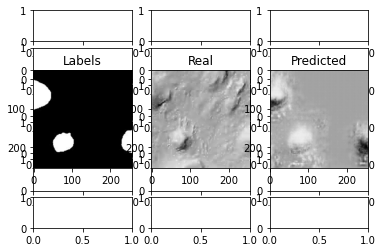

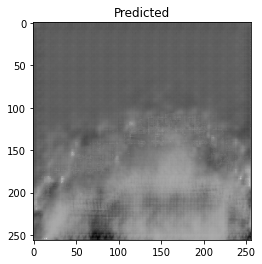

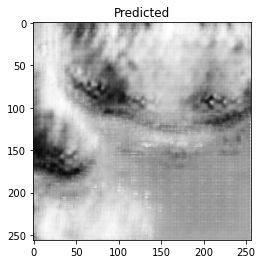

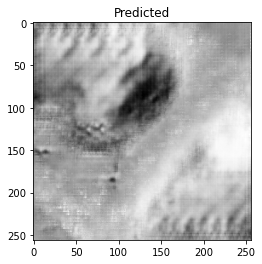

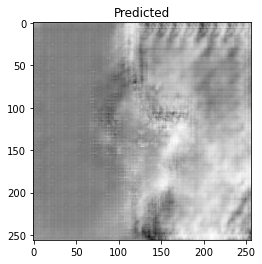

In [55]:

sample = 23
# show old and new image
# show original image
fig = plt.figure(figsize=(20,20))
# plt.axis('off')
# show original image

imgs = [1,2,3,4,5,6,]
fig, axs = plt.subplots(nrows=len(imgs), ncols=3)

for i in range(1,len(imgs)):

    fig.add_subplot(i,3,1)
    plt.title('Labels')
    plt.set_cmap('gray')
    plt.imshow(labels[i])
    
    
    fig.add_subplot(i,3,2)
    plt.title('Real')
    plt.set_cmap('gray')
    plt.imshow(reals[i])
    
    fig.add_subplot(i,3,3)
    plt.title('Predicted')
    plt.set_cmap('gray')
#     plt.axis('off')
    plt.imshow(fakes[i])
# plt.imshow(test_array[sample])



# fig.add_subplot(442)
# plt.title('Label')
# plt.set_cmap('gray')
# plt.imshow(labels_array[sample])
# plt.axis('off')
# fig.axes.get_xaxis().set_visible(False)
# fig.axes.get_yaxis().set_visible(False)
    plt.show() 

# fig.add_subplot(443)
# plt.title('test')
# plt.set_cmap('gray')
# # plt.imshow(test_array[sample])

# plt.show() 
# print(np.max(images_array))

In [48]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;


<IPython.core.display.Javascript object>

In [24]:
len(imgs)

6

In [ ]:
def generate_output(label,real,fake):
    

In [82]:
%matplotlib inline
def generate_images(label, real, fake,lab=False):
  plt.figure(figsize=(10, 10))

  display_list = [label, real, fake]
  title = ['Input Image', 'Ground Truth', 'Predicted Image']

  for i in range(3):
    if lab ==True:
        plt.subplot(1, 3, i+1)
        plt.title(title[i])
        
    else:
        plt.subplot(1, 3, i+1)
    # Getting the pixel values in the [0, 1] range to plot.
    plt.imshow(display_list[i])
    plt.axis('off')
  plt.show()

for index in range(0,len(labels)):
    if index !=0:
#         generate_images(labels[index],reals[index],fakes[index], lab=True)    
#     else:
#         if len(np.unique(labels[index])):
#             generate_images(labels[index],reals[index],fakes[index])

IndentationError: expected an indented block (Temp/ipykernel_16956/256184219.py, line 25)

In [148]:
def fast_hist(a, b, n):
    # print('saving')
    # sio.savemat('/tmp/fcn_debug/xx.mat', {'a':a, 'b':b, 'n':n})
    
    k = np.where((a >= 0) & (a < n))[0]
    bc = np.bincount(n * a[k].astype(int) + b[k], minlength=n**2)
    if len(bc) != n**2:
        # ignore this example if dimension mismatch
        return 0
    return bc.reshape(n, n)

def get_scores(hist):
    # Mean pixel accuracy
    acc = np.diag(hist).sum() / (hist.sum() + 1e-12)

    # Per class accuracy
    cl_acc = np.diag(hist) / (hist.sum(1) + 1e-12)

    # Per class IoU
    iu = np.diag(hist) / (hist.sum(1) + hist.sum(0) - np.diag(hist) + 1e-12)

    return acc, np.nanmean(cl_acc), np.nanmean(iu), cl_acc, iu

# fast_hist(reals[0],fakes[0], 255)
mean_pixel_acc, mean_class_acc, mean_class_iou, per_class_acc, per_class_iou = get_scores(hist_perframe)



In [149]:
n_cl = len(reals)
hist_perframe = np.zeros((n_cl, n_cl))

for img in range(0,len(reals)):
    real = reals[img]
    fake = fakes[img]
    hist_perframe += fast_hist(real.flatten(), fake.flatten(), n_cl)
mean_pixel_acc, mean_class_acc, mean_class_iou, per_class_acc, per_class_iou = get_scores(hist_perframe)
#     score = mutual_info_score(real,fake)
#     print(score)
print("m,ean_pixel_acc, mean_class_acc, mean_class_iou, per_class_acc, per_class_iou",mean_pixel_acc, mean_class_acc, mean_class_iou)
# plt.hist = ()

#     histogram, bin_edges = np.histogram(fakes[img][:,:,0], bins=2, range=(0, 255))
#     print((histogram))
#     plt.plot(histogram)

#     print(np.unique(img[:,:,1]))
#     imgx = Image.fromarray(img)
#     plt.imshow(imgx)

m,ean_pixel_acc, mean_class_acc, mean_class_iou, per_class_acc, per_class_iou 0.9998201975865068 0.0298333333333208 0.0160519044555971


In [150]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import cv2

for index in range(0,len(reals)):
# read image
    im = reals[index]
    # calculate mean value from RGB channels and flatten to 1D array
    vals = im.mean(axis=2).flatten()
    # calculate histogram
    counts, bins = np.histogram(vals, range(257))
    fk = fakes[index]
    # calculate mean value from RGB channels and flatten to 1D array
    fk_vals = fk.mean(axis=2).flatten()
    # calculate histogram
    fk_counts, fk_bins = np.histogram(fk_vals, range(257))
    
    score = mutual_info_score(fk_vals, vals)
    print(score)
    
    # plot histogram centered on values 0..255
# # plot histogram centered on values 0..255
# plt.bar(bins[:-1] - 0.5, counts, width=1, edgecolor='none')
# plt.xlim([-0.5, 255.5])
# plt.show()

C:\Users\handr\anaconda3\envs\ai\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
C:\Users\handr\anaconda3\envs\ai\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
C:\Users\handr\anaconda3\envs\ai\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)


0.45802554364953957
0.4274694826033424
0.4254559792584868


C:\Users\handr\anaconda3\envs\ai\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
C:\Users\handr\anaconda3\envs\ai\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
C:\Users\handr\anaconda3\envs\ai\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)


0.46353204361439077
0.34558426770612327
0.4586098311162864


C:\Users\handr\anaconda3\envs\ai\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
C:\Users\handr\anaconda3\envs\ai\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
C:\Users\handr\anaconda3\envs\ai\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)


0.3150350594514647
0.2927885823306588
0.4516504115953483


C:\Users\handr\anaconda3\envs\ai\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
C:\Users\handr\anaconda3\envs\ai\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
C:\Users\handr\anaconda3\envs\ai\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)


0.21401374745016416
0.2697133006394355
0.306007964205428


C:\Users\handr\anaconda3\envs\ai\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
C:\Users\handr\anaconda3\envs\ai\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
C:\Users\handr\anaconda3\envs\ai\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)


0.4156562661181978
0.1139112855187873
0.35878277689003224


C:\Users\handr\anaconda3\envs\ai\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
C:\Users\handr\anaconda3\envs\ai\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
C:\Users\handr\anaconda3\envs\ai\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)


0.1686087845852713
0.23201960459186027
0.12427538544725518


C:\Users\handr\anaconda3\envs\ai\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
C:\Users\handr\anaconda3\envs\ai\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
C:\Users\handr\anaconda3\envs\ai\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)


0.10802157858155215
0.08957767301779801
0.39119327886104865


C:\Users\handr\anaconda3\envs\ai\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
C:\Users\handr\anaconda3\envs\ai\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
C:\Users\handr\anaconda3\envs\ai\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)


0.420337070456707
0.21756180474231523
0.3670965004829612


C:\Users\handr\anaconda3\envs\ai\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
C:\Users\handr\anaconda3\envs\ai\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
C:\Users\handr\anaconda3\envs\ai\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)


0.42618207626534016
0.4472933534460256
0.5084444229102448
0.4504501936662658
0.46969698043009467


C:\Users\handr\anaconda3\envs\ai\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
C:\Users\handr\anaconda3\envs\ai\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
C:\Users\handr\anaconda3\envs\ai\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)


0.27241949003066435
0.48731668670450634
0.17974575343619575


C:\Users\handr\anaconda3\envs\ai\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
C:\Users\handr\anaconda3\envs\ai\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
C:\Users\handr\anaconda3\envs\ai\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)


0.15477187510479026
0.18104953824386308
0.13113526641689205


C:\Users\handr\anaconda3\envs\ai\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
C:\Users\handr\anaconda3\envs\ai\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
C:\Users\handr\anaconda3\envs\ai\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)


0.41173483707090763
0.4158490565908195
0.3518123399828374


C:\Users\handr\anaconda3\envs\ai\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
C:\Users\handr\anaconda3\envs\ai\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
C:\Users\handr\anaconda3\envs\ai\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)


0.22265803010001695
0.08622879861396401
0.0744776098589254


C:\Users\handr\anaconda3\envs\ai\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
C:\Users\handr\anaconda3\envs\ai\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
C:\Users\handr\anaconda3\envs\ai\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)


0.05991976922441582
0.05192567294360007
0.07272665064893655


C:\Users\handr\anaconda3\envs\ai\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
C:\Users\handr\anaconda3\envs\ai\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
C:\Users\handr\anaconda3\envs\ai\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)


0.13024302211136157
0.11806424592168627
0.19676551969040273


C:\Users\handr\anaconda3\envs\ai\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
C:\Users\handr\anaconda3\envs\ai\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
C:\Users\handr\anaconda3\envs\ai\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)


0.2542759726544167
0.37429544768800455
0.1533142866187881


C:\Users\handr\anaconda3\envs\ai\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
C:\Users\handr\anaconda3\envs\ai\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
C:\Users\handr\anaconda3\envs\ai\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
C:\Users\handr\anaconda3\envs\ai\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for targe

0.45957434027506106
0.3966694707259255
0.09010991374657672


C:\Users\handr\anaconda3\envs\ai\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
C:\Users\handr\anaconda3\envs\ai\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
C:\Users\handr\anaconda3\envs\ai\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)


0.08862632409677552
0.07692911006061628
0.0847376204865729


C:\Users\handr\anaconda3\envs\ai\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
C:\Users\handr\anaconda3\envs\ai\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
C:\Users\handr\anaconda3\envs\ai\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)


0.08843602297418238
0.12958336199105303
0.07569053322608849


C:\Users\handr\anaconda3\envs\ai\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
C:\Users\handr\anaconda3\envs\ai\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
C:\Users\handr\anaconda3\envs\ai\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)


0.15406952006575858
0.14052779958080347
0.11396375318712021


C:\Users\handr\anaconda3\envs\ai\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
C:\Users\handr\anaconda3\envs\ai\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
C:\Users\handr\anaconda3\envs\ai\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)


0.08425894380223753
0.08533819718497716
0.1513196888676881


C:\Users\handr\anaconda3\envs\ai\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
C:\Users\handr\anaconda3\envs\ai\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
C:\Users\handr\anaconda3\envs\ai\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)


0.3035571427931072
0.10361988172364027
0.14707242619087918


C:\Users\handr\anaconda3\envs\ai\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
C:\Users\handr\anaconda3\envs\ai\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
C:\Users\handr\anaconda3\envs\ai\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)


0.36412093034903825
0.46950182091550424
0.46612542534994306


C:\Users\handr\anaconda3\envs\ai\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
C:\Users\handr\anaconda3\envs\ai\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
C:\Users\handr\anaconda3\envs\ai\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)


0.43181496157831534
0.19713764832131503
0.3600258170381598


C:\Users\handr\anaconda3\envs\ai\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
C:\Users\handr\anaconda3\envs\ai\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
C:\Users\handr\anaconda3\envs\ai\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)


0.3061456970021533
0.11645510805186875
0.163278608347311


C:\Users\handr\anaconda3\envs\ai\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
C:\Users\handr\anaconda3\envs\ai\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
C:\Users\handr\anaconda3\envs\ai\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)


0.3434840815686947
0.13834556258559455
0.32503035463244423


C:\Users\handr\anaconda3\envs\ai\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
C:\Users\handr\anaconda3\envs\ai\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
C:\Users\handr\anaconda3\envs\ai\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)


0.22150763664892867
0.33384024951816804
0.2609554052899059


C:\Users\handr\anaconda3\envs\ai\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
C:\Users\handr\anaconda3\envs\ai\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
C:\Users\handr\anaconda3\envs\ai\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)


0.09746621100238531
0.08241920120210423
0.07842811877073017


C:\Users\handr\anaconda3\envs\ai\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
C:\Users\handr\anaconda3\envs\ai\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
C:\Users\handr\anaconda3\envs\ai\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)


0.0870298738698119
0.0762491483164659
0.06320766117502377


C:\Users\handr\anaconda3\envs\ai\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
C:\Users\handr\anaconda3\envs\ai\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
C:\Users\handr\anaconda3\envs\ai\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)


0.14590349610940145
0.07766166649578976
0.09943613965744645


C:\Users\handr\anaconda3\envs\ai\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
C:\Users\handr\anaconda3\envs\ai\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
C:\Users\handr\anaconda3\envs\ai\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)


0.11589741727776151
0.14626044154167764
0.10680886689297261


C:\Users\handr\anaconda3\envs\ai\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
C:\Users\handr\anaconda3\envs\ai\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
C:\Users\handr\anaconda3\envs\ai\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)


0.09491242994345338
0.22413702944570468
0.4454587663711493
0.12997610081089178
0.14115973214619668


C:\Users\handr\anaconda3\envs\ai\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
C:\Users\handr\anaconda3\envs\ai\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)


In [170]:

print(mean_squared_error(fakes[sample].ravel(),reals[sample].ravel())) 


39.3503672281901


In [164]:
#  read image
im = fakes[2]

print(im.shape)
# calculate mean value from RGB channels and flatten to 1D array
# vals = im.mean(axis=2).flatten()
# calculate histogram
# counts, bins = np.histogram(vals, range(257))
# plot histogram centered on values 0..255
# plt.bar(bins[:-1] - 0.5, counts, width=1, edgecolor='none')
# plt.xlim([-0.5, 255.5])
# plt.show()


muts = []
bhats =[]

for sample in range(0,20):
    v1 = fakes[sample].mean(axis=2).flatten()
    v2 = reals[sample].mean(axis=2).flatten()
    
    hist_2d, x_edges, y_edges = np.histogram2d(
  v1.ravel(),
      v2.ravel(),
         bins=256)
#     print(normalized_mutual_info_score(v1,v2))
#     bhats.append(normalized_mutual_info_score(v1,v2))
    
    print(mse(fakes[sample],reals[sample])) 
    
    ##
#     p2 = np.histogram(d2,100)[0]
#     p2 = p1 / np.sum(p2)
#     print(bhattacharyya_distance(v2,v1))
    muts.append(mutual_information(hist_2d))
print('Mean is ',np.mean(muts))
def mutual_information(hgram):
    """ Mutual information for joint histogram
    """
    # Convert bins counts to probability values
    pxy = hgram / float(np.sum(hgram))
    px = np.sum(pxy, axis=1) # marginal for x over y
    py = np.sum(pxy, axis=0) # marginal for y over x
    px_py = px[:, None] * py[None, :] # Broadcast to multiply marginals
    # Now we can do the calculation using the pxy, px_py 2D arrays
    nzs = pxy > 0 # Only non-zero pxy values contribute to the sum
    return np.sum(pxy[nzs] * np.log(pxy[nzs] / px_py[nzs]))
# plt.imshow(hist_2d)


(256, 256, 3)
0.45802554364954
0.4274694826033429
0.42545597925848727
0.46353204361439126
0.3455842677061237
0.45860983111628695
0.31503505945146515
0.29278858233065924
0.4516504115953488
0.21401374745016458
0.26971330063943594
0.3060079642054284
0.41565626611819834
0.11391128551878771
0.35878277689003274
0.1686087845852718
0.23201960459186075
0.12427538544725557
0.10802157858155256
0.0895776730177984
Mean is  0.3019369784185716


In [83]:
def bhattacharyya_distance(distribution1: "dict", distribution2: "dict",) -> int:
    """ Estimate Bhattacharyya Distance (between General Distributions)
    
    Args:
        distribution1: a sample distribution 1
        distribution2: a sample distribution 2
    
    Returns:
        Bhattacharyya distance
    """
    sq = 0
    for i in range(len(distribution1)):
        sq  += np.sqrt(distribution1[i]*distribution2[i])
    
    return -np.log(sq)



In [86]:
bhattacharyya_distance(mean(fake_hists[0]),mean(real_hists[0])
                      )

-5.545177444479562

In [52]:
# bhattacharyya test
import numpy
import math

h1 = [ 1, 2, 3, 4, 5, 6, 7, 8 ];
h2 = [ 6, 5, 4, 3, 2, 1, 0, 0 ];
h3 = [ 8, 7, 6, 5, 4, 3, 2, 1 ];
h4 = [ 1, 2, 3, 4, 4, 3, 2, 1 ];
h5 = [ 8, 8, 8, 8, 8, 8, 8, 8 ];

h = [ h1, h2, h3, h4, h5 ];

def mean( hist ):
    mean = 0.0;
    for i in hist:
        mean += i;
    mean/= len(hist);
    return mean;

def bhatta ( hist1,  hist2):
    # calculate mean of hist1
    h1_ = mean(hist1);

    # calculate mean of hist2
    h2_ = mean(hist2);

    # calculate score
    score = 0;
    for i in range(8):
        score += math.sqrt( hist1[i] * hist2[i] );
    # print h1_,h2_,score;
    score = math.sqrt( 1 - ( 1 / math.sqrt(h1_*h2_*8*8) ) * score );
    return score;

# # generate and output scores
# scores = [];
# for i in range(len(h)):
#     score = [];
#     for j in range(len(h)):
#         score.append( bhatta(h[i],h[j]) );
#     scores.append(score);

# for i in scores:
#     print (i)

[0.0, 0.5829473992320814, 0.38838260391018525, 0.24018505569731874, 0.19788811106463064]
[0.5829473992320814, 0.0, 0.21900173667175776, 0.40691958649312965, 0.40534773052584305]
[0.38838260391018525, 0.21900173667175776, 0.0, 0.24018505569731874, 0.19788811106463064]
[0.24018505569731874, 0.40691958649312965, 0.24018505569731874, 0.0, 0.16789959640267496]
[0.19788811106463064, 0.40534773052584305, 0.19788811106463064, 0.16789959640267496, 0.0]


In [65]:

import cv2
import matplotlib.pyplot as plt
histogram = cv2.calcHist(fakes[0], [0], None, [256], [0, 256])
plt.plot(histogram, color='k')
plt.show()

error: OpenCV(4.5.4) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\histogram.cpp:1007: error: (-210:Unsupported format or combination of formats)  in function 'cv::calcHist'


In [107]:

#BASE MODEL WITHOUT GAN
tp =304654
fp=129977
tn=22521952
fn=525785
acc=(tp+tn)/(tp+tn+fp+fn)
recall = tp/(tp+fn)
precision = tp/(tp+fp)
print('BASE accuracy: ',acc)
print('BASE recall: ',recall)
print('BASE precision: ',precision)

BASE accuracy:  0.9720742814353306
BASE recall:  0.3668589745905479
BASE precision:  0.7009486207840674


In [110]:
#GAN AUGMWENTED REDSUTLS
tp =492722
fp=401159
tn=22250770
fn=337717
acc=(tp+tn)/(tp+tn+fp+fn)
recall = tp/(tp+fn)
precision = tp/(tp+fp)
print('USING GAN accuracy: ',acc)
print('USING GAN recall: ',recall)
print('USING GAN precision: ',precision)

USING GAN accuracy:  0.9685348598574045
USING GAN recall:  0.5933271438359711
USING GAN precision:  0.5512165489589778
